Necessary imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Reading Images

In [543]:
img1 = cv2.imread("./image1.jpg")
img2 = cv2.imread("./image2.jpg")
img_ori1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_ori2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

Image1 

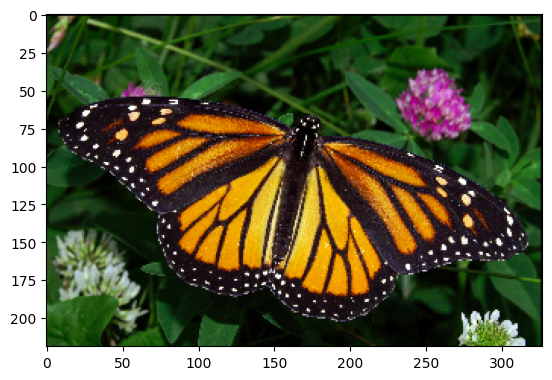

In [544]:
plt.imshow(img_ori1)

Image2

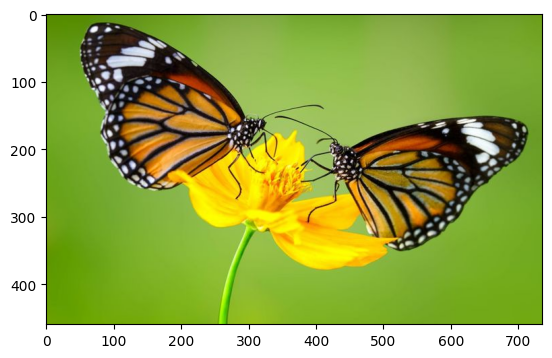

In [545]:
plt.imshow(img_ori2)

Resizing the images

In [546]:
img1 = cv2.resize(img_ori1, (64, 64))
img2 = cv2.resize(img_ori2, (64, 64))

K mean Function

In [555]:
def get_k_mean(img, k):
    pixels = img.reshape((-1,3))

    # Perform k-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixels.astype(np.float32), k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert the centers of the clusters to uint8 (RGB format)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(img.shape)
    return segmented_image


Plotting the K means

(-0.5, 735.5, 459.5, -0.5)

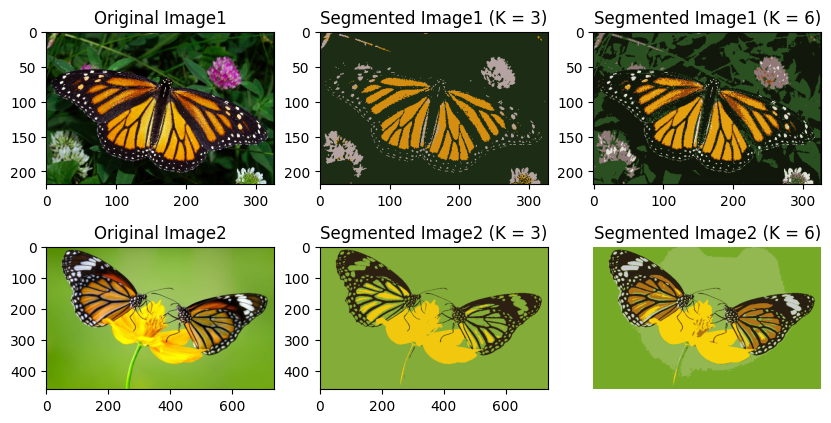

In [569]:
fig, axs = plt.subplots(2,3, figsize = (10,5))

axs[0][0].imshow(img_ori1)
axs[0][0].set_title('Original Image1')
plt.axis('off')

axs[0][1].imshow(get_k_mean(img_ori1, 3))
axs[0][1].set_title('Segmented Image1 (K = {})'.format(3))
plt.axis('off')

axs[0][2].imshow(get_k_mean(img_ori1, 6))
axs[0][2].set_title('Segmented Image1 (K = {})'.format(6))
plt.axis('off')

axs[1][0].imshow(img_ori2)
axs[1][0].set_title('Original Image2')
plt.axis('off')

axs[1][1].imshow(get_k_mean(img_ori2, 3))
axs[1][1].set_title('Segmented Image2 (K = {})'.format(3))
plt.axis('off')

axs[1][2].imshow(get_k_mean(img_ori2, 6))
axs[1][2].set_title('Segmented Image2 (K = {})'.format(6))
plt.axis('off')

# plt.show()

In [570]:
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

Getting the laplacian matrix

In [590]:
def get_L_matrix(img, lamda = 0, sigma = 10):
        # Construct the affinity matrix W
    n = 4096
    features = img.reshape(-1,1)
    W = np.zeros((n, n))
    D = np.identity(n)
    for i in range(n):
        for j in range(n):
            if i != j:
                x1, y1 = i//64, i%64
                x2, y2 = j//64, j%64
                d = np.linalg.norm(features[i][0] - features[j][0])**2 + lamda * np.linalg.norm(np.array([x1, y1], dtype=np.float32) - np.array([x2, y2], dtype=np.float32))**2
                W[i, j] = np.exp((-1 * d) / (2 * sigma**2))

    # Compute the diagonal matrix D
    for i in range(n):
        D[i, i] = np.sum(W[i, :])
    L = D - W
    return L

In [591]:
from sklearn.cluster import KMeans

def get_spectral_cluster(img, k):
    # Flatten the image to a 2D array of pixels (rows x columns, 3 color channels)
    # Perform k-means clustering
    L_matrix = get_L_matrix(img, 0, 10)
    eigenvalues, eigenvectors = np.linalg.eig(L_matrix)

    # Sort eigenvalues and eigenvectors by ascending order of eigenvalues
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    features = sorted_eigenvectors[:, :k].real

    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(features)
    segmented_image = clusters.reshape(64, 64)

    return segmented_image

C:\Users\PRINCE VERMA\AppData\Local\Temp\ipykernel_9348\2296071439.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  d = np.linalg.norm(features[i][0] - features[j][0])**2
c:\Users\PRINCE VERMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PRINCE VERMA\AppData\Local\Temp\ipykernel_9348\2296071439.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  d = np.linalg.norm(features[i][0] - features[j][0])**2
c:\Users\PRINCE VERMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Use

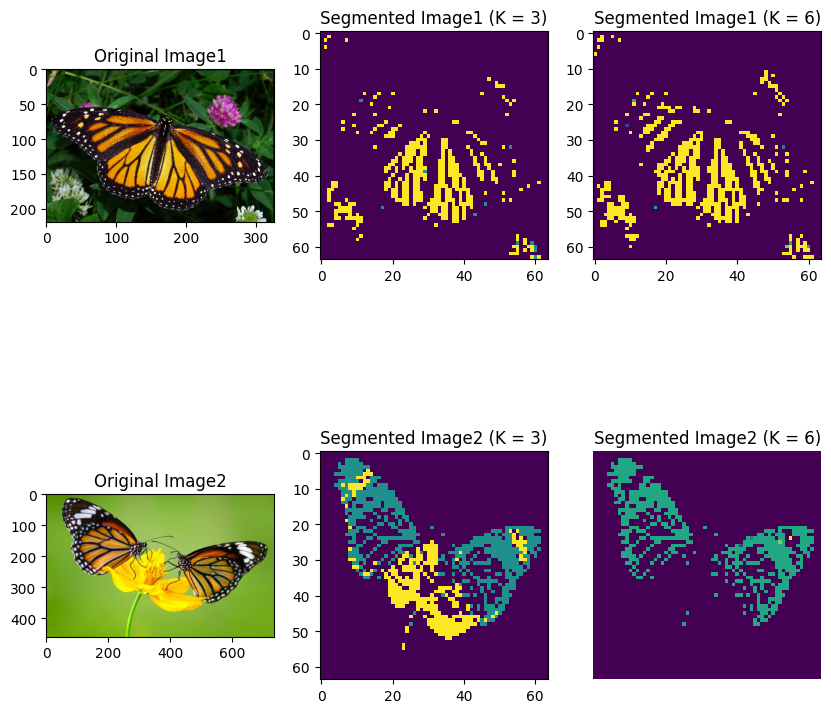

In [592]:
fig, axs = plt.subplots(2,3, figsize = (10,10))

axs[0][0].imshow(img_ori1)
axs[0][0].set_title('Original Image1')
plt.axis('off')

axs[0][1].imshow(get_spectral_cluster(img1, 3))
axs[0][1].set_title('Segmented Image1 (K = {})'.format(3))
plt.axis('off')

axs[0][2].imshow(get_spectral_cluster(img1, 6))
axs[0][2].set_title('Segmented Image1 (K = {})'.format(6))
plt.axis('off')

axs[1][0].imshow(img_ori2)
axs[1][0].set_title('Original Image2')
plt.axis('off')

axs[1][1].imshow(get_spectral_cluster(img2, 3))
axs[1][1].set_title('Segmented Image2 (K = {})'.format(3))
plt.axis('off')

axs[1][2].imshow(get_spectral_cluster(img2, 6))
axs[1][2].set_title('Segmented Image2 (K = {})'.format(6))
plt.axis('off')

plt.show()